# Housing price prediction
In this notebook we train a simple neural network model using tensorflow, keras framework to predict the housing price based on its features as following:
- price
- area,
- bedrooms
- bathrooms
- stories 
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- parking
- prefarea
- furnishingstatus

Downlod the Housing Price kaggel dataset

# Importing data

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing.csv', encoding='ISO-8859-1')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


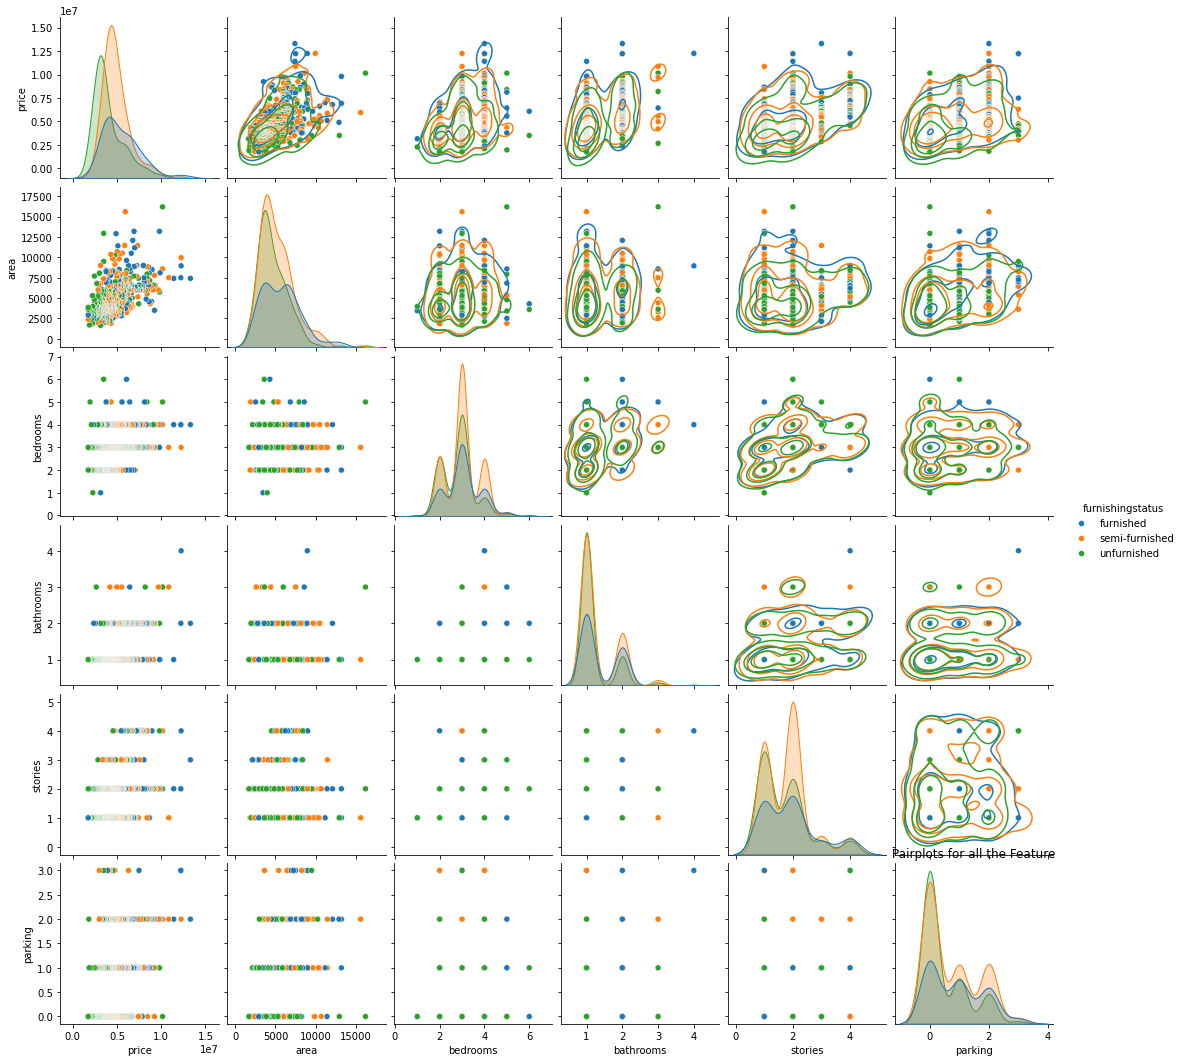

In [4]:
g = sns.pairplot(df, hue="furnishingstatus")
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
display(df.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Dealing with Outliers 

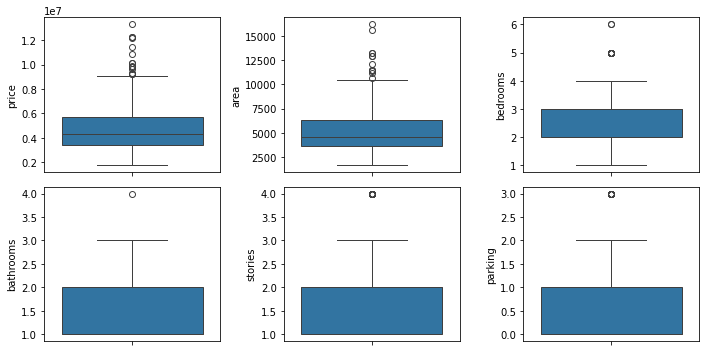

In [7]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x14142d3ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x14142d4c1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14142d3c6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14142d4c8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14142d4cc70>],
 'means': []}

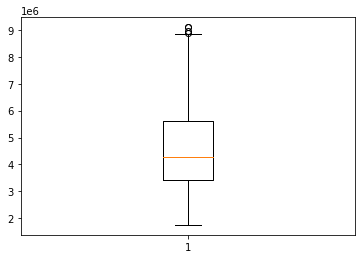

In [8]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)



{'whiskers': [<matplotlib.lines.Line2D at 0x14142db2190>,
 'caps': [<matplotlib.lines.Line2D at 0x14142db28b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14142da3dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x14142db2fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14142dbd3a0>],
 'means': []}

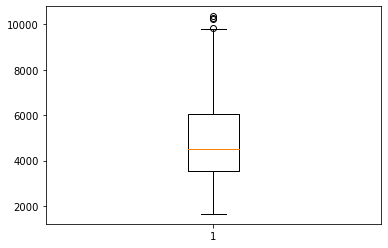

In [9]:
# Dealing with outliers in area 
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

# Preprocessing

# categorizing binary data features
- There are five categorical columns and the rest are continuous features, needed to encode the categorical features for further utilization

In [11]:
df = pd.get_dummies(df,columns=['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus'])

In [12]:
df

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_1,bedrooms_2,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,yes,no,yes,no,no,no,False,False,...,True,False,False,False,False,True,False,False,True,False
16,9100000,6600,yes,yes,yes,no,yes,yes,False,False,...,True,False,False,False,True,False,False,False,False,True
17,8960000,8500,yes,no,no,no,yes,no,False,False,...,False,False,True,False,False,True,False,True,False,False
18,8890000,4600,yes,yes,no,no,yes,no,False,False,...,True,False,False,False,False,True,False,True,False,False
19,8855000,6420,yes,no,no,no,yes,yes,False,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,yes,no,yes,no,no,no,False,True,...,False,False,False,False,False,True,False,False,False,True
541,1767150,2400,no,no,no,no,no,no,False,False,...,False,False,False,True,False,False,False,False,True,False
542,1750000,3620,yes,no,no,no,no,no,False,True,...,False,False,False,True,False,False,False,False,False,True
543,1750000,2910,no,no,no,no,no,no,False,False,...,False,False,False,True,False,False,False,True,False,False


In [13]:
cat_col = list(df.columns[(df == 'yes').any() | (df =='no').any() | (df == False).any() | (df == True).any() | (df == 'furnished').any()])
cat_col 

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'stories_1',
 'stories_2',
 'stories_3',
 'stories_4',
 'parking_0',
 'parking_1',
 'parking_2',
 'parking_3',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [14]:
label_Encoder = LabelEncoder()
for i in cat_col:
    df[i] = label_Encoder.fit_transform(df[i])


In [15]:
df

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_1,bedrooms_2,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
16,9100000,6600,1,1,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
17,8960000,8500,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
18,8890000,4600,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
19,8855000,6420,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
541,1767150,2400,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
542,1750000,3620,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
543,1750000,2910,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
X = df.drop(['price'], axis=1)

In [17]:
X.head(2)

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_1,bedrooms_2,bedrooms_3,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,6000,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
16,6600,1,1,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [18]:
X.tail(2)

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_1,bedrooms_2,bedrooms_3,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
543,2910,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
544,3850,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


# Normalization using MinMax Scaler

In [19]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [20]:
y = df['price']

In [21]:
y.shape

(517,)

In [22]:
y = y.values.reshape(-1,1)

In [23]:
y.shape

(517, 1)

In [24]:
y = scaler.fit_transform(y)

# Feature Extraction
It seems that there is a strong multicollinearity. We can do the following methods to fix it:
- Variance inflation factor (VEF)
- Recursive Feature Elimination (RFE)
- Feature Elmination using PCA Decomposition

In [25]:
# applying PCS
from sklearn.decomposition import PCA

pca = PCA()  # Choose the number of components to retain
principal_components = pca.fit_transform(scaled_X)


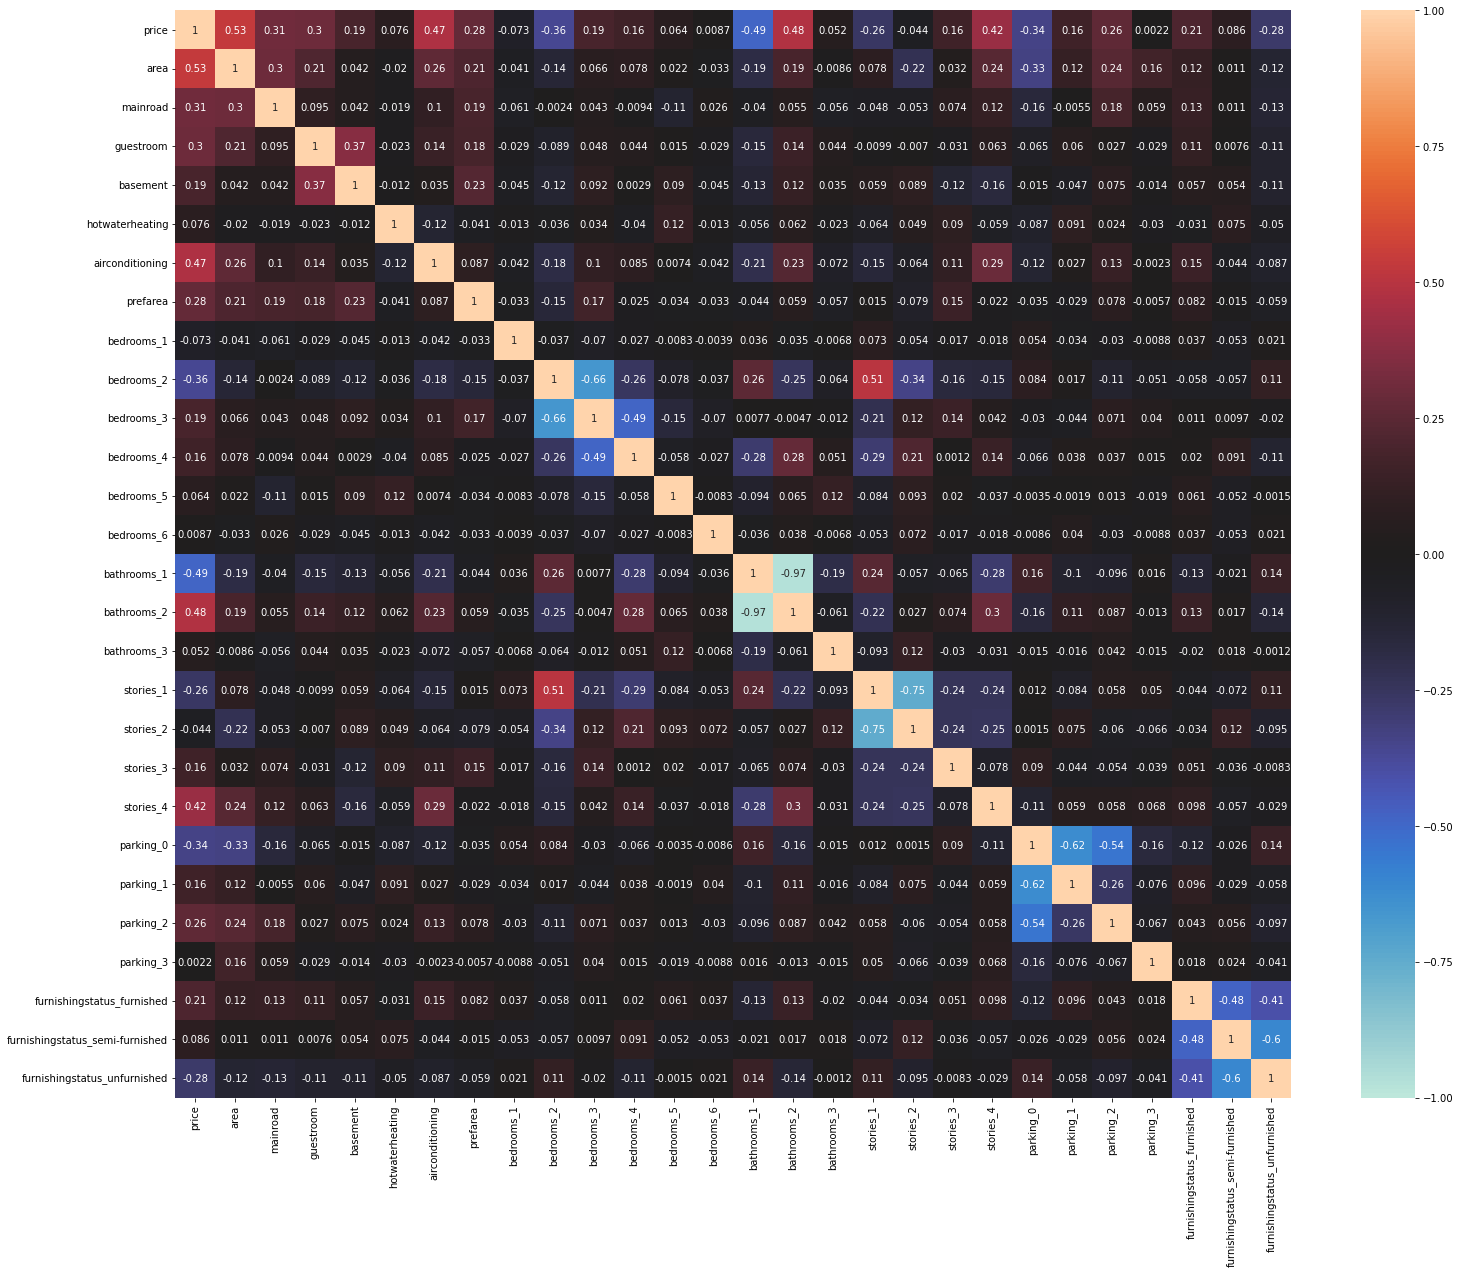

In [26]:
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

In [27]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:30]

array([12.49, 21.12, 28.28, 34.81, 40.7 , 46.27, 51.16, 55.94, 60.42,
       64.62, 68.56, 72.4 , 76.13, 79.68, 83.07, 86.29, 89.17, 91.83,
       94.17, 96.4 , 98.44, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

The conclusion of this is that we need to use a total of seven principal components in the regression learner.

# Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state = 42)

In [30]:
X_train.shape

(413, 27)

In [31]:
X_test.shape

(104, 27)

In [32]:
X_train = pca.fit_transform(X_train)[:,0:23]
X_test = pca.transform(X_test)[:,0:23]

# Creating Neural Network Model

In [33]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2

In [34]:
X_train.shape[1]

23

In [35]:
model = Sequential()
model.add(Dense(50, input_dim = X_train.shape[1], activation = 'relu', kernel_regularizer=l1(0.01)))
model.add(Dense(50, activation = 'relu',kernel_regularizer=l1(0.01)))
model.add(Dense(1, activation = 'linear'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1200      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3801 (14.85 KB)
Trainable params: 3801 (14.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compiling the model

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
eposhs_hist = model.fit(X_train, y_train, epochs=200, batch_size = 25, verbose=1, validation_split= 0.2)

Epoch 1/200
14/14 [==============================] - 1s 19ms/step - loss: 5.5650 - val_loss: 5.2250
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 5.0473 - val_loss: 4.7982
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 4.6972 - val_loss: 4.4961
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 4.4307 - val_loss: 4.2405
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 4.1901 - val_loss: 4.0142
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 3.9621 - val_loss: 3.7974
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 3.7482 - val_loss: 3.5955
Epoch 8/200
14/14 [==============================] - 0s 4ms/step - loss: 3.5377 - val_loss: 3.3968
Epoch 9/200
14/14 [==============================] - 0s 4ms/step - loss: 3.3389 - val_loss: 3.2049
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 3.1477 - val_loss: 3.0237
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.4082 - val_loss: 0.4396
Epoch 84/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4052 - val_loss: 0.4412
Epoch 85/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4027 - val_loss: 0.4391
Epoch 86/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4057 - val_loss: 0.4406
Epoch 87/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4078 - val_loss: 0.4321
Epoch 88/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4003 - val_loss: 0.4383
Epoch 89/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3982 - val_loss: 0.4386
Epoch 90/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3962 - val_loss: 0.4374
Epoch 91/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3962 - val_loss: 0.4332
Epoch 92/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3986 - val_loss: 0.4352
Epoch 93/200


14/14 [==============================] - 0s 3ms/step - loss: 0.3478 - val_loss: 0.4231
Epoch 165/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3468 - val_loss: 0.4237
Epoch 166/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3427 - val_loss: 0.4206
Epoch 167/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3428 - val_loss: 0.4222
Epoch 168/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3419 - val_loss: 0.4240
Epoch 169/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3418 - val_loss: 0.4260
Epoch 170/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3409 - val_loss: 0.4167
Epoch 171/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3398 - val_loss: 0.4181
Epoch 172/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3396 - val_loss: 0.4233
Epoch 173/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3436 - val_loss: 0.4224
Epoc

# Model Evaluation

In [39]:
eposhs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

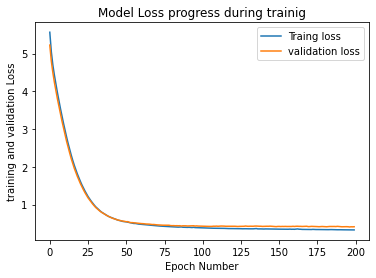

In [40]:

plt.plot(eposhs_hist.history['loss'])
plt.plot(eposhs_hist.history['val_loss'])
plt.title('Model Loss progress during trainig')
plt.ylabel('training and validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Traing loss', 'validation loss'])

In [41]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.65
R-squared (R^2): 0.63
